In [1]:
#load in some packages
import numpy as np

from matplotlib import pyplot as plt

import pandas as pd

import seaborn as sns

from IPython.display import IFrame

import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [2]:
data_folder = "../southwark_bike_r_analysis/data/"

In [3]:
#load in the data
bike_directions = pd.read_csv(data_folder+"bike_count_wide_directions.csv")

bike_long = pd.read_csv(data_folder+"bike_count_only_oob.csv")

In [4]:
#what are the names of the variables in bike_long
bike_long.columns.tolist()

['ID',
 'ROAD',
 'EASTING',
 'NORTHING',
 'DIRECTION',
 'MONTH',
 'YEAR',
 'TOTAL.FLOW',
 'PEDAL.MOTORCYCLE',
 'CAR',
 'TRAILER_CARAVAN_VAN',
 'X2AXLE_TRUCKorBUS',
 'X3AXLE_TRUCKorBUS',
 'X4AXLE_TRUCK',
 'LGV',
 'TOTAL.LARGER.THAN.CAR',
 'DFT.PEDAL.CYCLE',
 'DFT.MOTOR.CYCLE',
 'AVERAGE_SPEED',
 'X_85TH_SPEED',
 'road_size_bin']

In [9]:
#altair don't like dots so rename the ones with dots in
bike_long = bike_long.rename(index=str, columns = {'TOTAL.FLOW':'total_flow', 'DFT.PEDAL.CYCLE':'pedal_cycle'})

In [10]:
#what are the classes of these columns?
bike_long.dtypes

ID                        object
ROAD                      object
EASTING                  float64
NORTHING                 float64
DIRECTION                 object
MONTH                      int64
YEAR                       int64
total_flow                 int64
PEDAL.MOTORCYCLE           int64
CAR                        int64
TRAILER_CARAVAN_VAN        int64
X2AXLE_TRUCKorBUS          int64
X3AXLE_TRUCKorBUS          int64
X4AXLE_TRUCK               int64
LGV                        int64
TOTAL.LARGER.THAN.CAR      int64
pedal_cycle                int64
DFT.MOTOR.CYCLE            int64
AVERAGE_SPEED            float64
X_85TH_SPEED             float64
road_size_bin             object
dtype: object

In [11]:
#look at the head
bike_long.head()

ID           ROAD     EASTING    NORTHING DIRECTION  MONTH  YEAR  \
0   AMH134  Ablett Street  535092.000  178230.000         E     10  2016   
1   AMH134  Ablett Street  535092.000  178230.000         W     10  2016   
2    MIX73      Adys Road  534005.618  175581.460         N     12  2016   
3    MIX73      Adys Road  534005.618  175581.460         S     12  2016   
4  SPINE18      Adys Road  534065.749  175420.376         N     12  2016   

   total_flow  PEDAL.MOTORCYCLE   CAR  ...  X2AXLE_TRUCKorBUS  \
0         977                19   876  ...                 79   
1         540                17   491  ...                 28   
2        2216               285  1840  ...                 59   
3        2683               312  2190  ...                 67   
4        2117               199  1783  ...                 78   

   X3AXLE_TRUCKorBUS  X4AXLE_TRUCK  LGV  TOTAL.LARGER.THAN.CAR  pedal_cycle  \
0                  1             1    0                     82          138   
1                  2             1    0                     32          153   
2                 12            11    4                     91           85   
3                 79            12   10                    181           92   
4                 30            10    5                    135           53   

   DFT.MOTOR.CYCLE  AVERAGE_SPEED  X_85TH_SPEED  road_size_bin  
0               74           19.3          23.7          small  
1               90           19.4          23.7          small  
2               91           16.5          19.4         medium  
3              112           15.5          18.8          large  
4               78           15.7          19.4         medium  

[5 rows x 21 columns]

In [ ]:
#change the names of

In [12]:
#hitmonchan colours (a bit dull remember to change)
color_map = {'N':'#a48b73', 'E':'#c5b4c5', 'S':'#bd314a', 'W':'#624a73'}

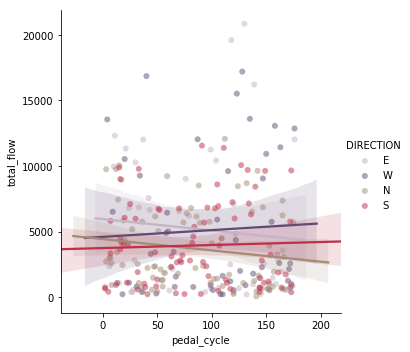

In [13]:
#quick sns plot

sns.lmplot(x='pedal_cycle', y='total_flow', data=bike_long, 
            hue='DIRECTION', 
            palette=color_map, 
            scatter_kws=dict(edgecolor='none', alpha=0.5))

In [14]:
#check that the data makes sense
bike_long['pedal_cycle'].mean()

88.715953307393

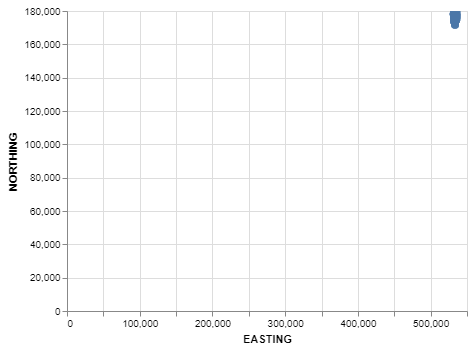

In [15]:
#run a quick altair chart
alt.Chart(bike_long).mark_circle(
    size=60
).encode(
    x='EASTING:Q', 
    y='NORTHING:Q'
).interactive()

In [ ]:
#troubleshoot altair not displaying
print(alt.renderers.active)

In [ ]:
#can't work out why it isn't working

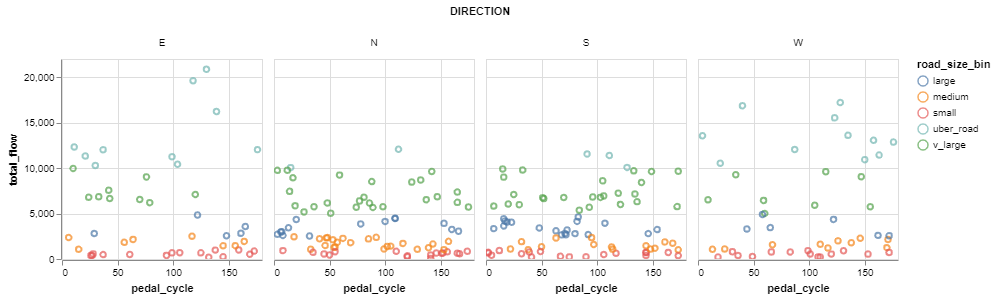

In [19]:
#look at some directional data
alt.Chart(bike_long).mark_point().encode(x='pedal_cycle:Q', y='total_flow:Q', color='road_size_bin:N').properties(width=200, height=200).facet(column='DIRECTION').interactive()

In [ ]:
#with the interactive one you can see that the source data is there and that it is referring to it but it isn't displaying
#what gives?

In [20]:
#let's geo this data!

import geopandas as gpd

In [38]:
bike_count_loc = gpd.read_file(data_folder+"bike_oob_loc_test1.geojson")

In [39]:
bike_count_loc.dtypes

ID                        object
ROAD                      object
DIRECTION                 object
MONTH                      int64
YEAR                       int64
TOTAL.FLOW                 int64
PEDAL.MOTORCYCLE           int64
CAR                        int64
TRAILER_CARAVAN_VAN       object
X2AXLE_TRUCKorBUS         object
X3AXLE_TRUCKorBUS         object
X4AXLE_TRUCK              object
LGV                       object
TOTAL.LARGER.THAN.CAR      int64
DFT.PEDAL.CYCLE            int64
DFT.MOTOR.CYCLE            int64
AVERAGE_SPEED            float64
X_85TH_SPEED              object
road_size_bin             object
geometry                  object
dtype: object

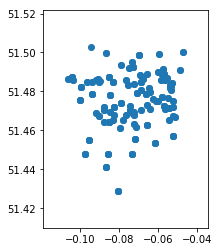

In [40]:
bike_count_loc.plot()

In [41]:
#rename those colnames
bike_count_loc = bike_count_loc.rename(index=str, columns = {'TOTAL.FLOW':'total_flow', 'DFT.PEDAL.CYCLE':'pedal_cycle'})

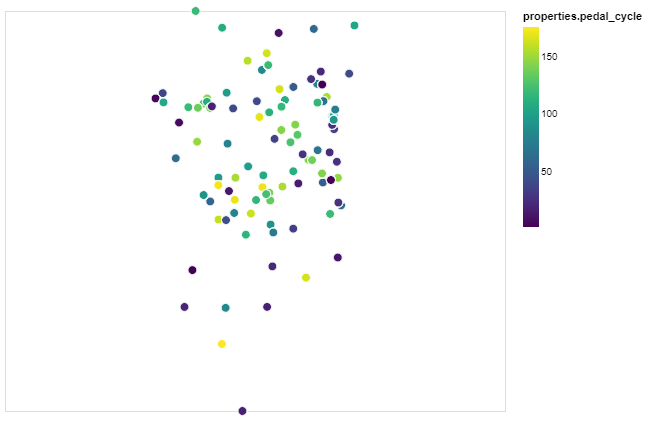

In [49]:
#now you can do some fancy viz stuff

data = alt.InlineData(values=bike_count_loc.to_crs(epsg=4326).to_json(), format=alt.DataFormat(property='features',type='json'))

alt.Chart(data).mark_geoshape(
    stroke='white'
).properties(
    width=500,
    height=400,
    projection={"type":'mercator'}
).encode(
    tooltip=['properties.pedal_cycle:Q', 'properties.total_flow:Q', 'properties.DIRECTION:N', 'properties.ROAD:N'],
    color='properties.pedal_cycle:Q'
)

In [131]:
#geo doesn't work so extract lon and lat instead
bike_count_loc['lon'] = bike_count_loc.geometry.x
bike_count_loc['lat'] = bike_count_loc.geometry.y

In [132]:
bike_count_loc.head()

ID           ROAD DIRECTION  MONTH  YEAR  total_flow  \
0   AMH134  Ablett Street         E     10  2016         977   
1   AMH134  Ablett Street         W     10  2016         540   
2    MIX73      Adys Road         N     12  2016        2216   
3    MIX73      Adys Road         S     12  2016        2683   
4  SPINE18      Adys Road         N     12  2016        2117   

   PEDAL.MOTORCYCLE   CAR TRAILER_CARAVAN_VAN X2AXLE_TRUCKorBUS  ... LGV  \
0                19   876                   1                79  ...   0   
1                17   491                   1                28  ...   0   
2               285  1840                   5                59  ...   4   
3               312  2190                  13                67  ...  10   
4               199  1783                  12                78  ...   5   

  TOTAL.LARGER.THAN.CAR pedal_cycle  DFT.MOTOR.CYCLE  AVERAGE_SPEED  \
0                    82         138               74           19.3   
1                    32         153               90           19.4   
2                    91          85               91           16.5   
3                   181          92              112           15.5   
4                   135          53               78           15.7   

   X_85TH_SPEED  road_size_bin                                 geometry  \
0          23.7          small               POINT (-0.05571 51.486892)   
1          23.7          small               POINT (-0.05571 51.486892)   
2          19.4         medium            POINT (-0.0723509 51.4633494)   
3          18.8          large            POINT (-0.0723509 51.4633494)   
4          19.4         medium  POINT (-0.07154679999999999 51.4618876)   

        lon        lat  
0 -0.055710  51.486892  
1 -0.055710  51.486892  
2 -0.072351  51.463349  
3 -0.072351  51.463349  
4 -0.071547  51.461888  

[5 rows x 22 columns]

In [154]:
bike_count_lonlat = pd.DataFrame(bike_count_loc.drop(columns='geometry'))

In [155]:
bike_count_lonlat.head()

ID           ROAD DIRECTION  MONTH  YEAR  total_flow  \
0   AMH134  Ablett Street         E     10  2016         977   
1   AMH134  Ablett Street         W     10  2016         540   
2    MIX73      Adys Road         N     12  2016        2216   
3    MIX73      Adys Road         S     12  2016        2683   
4  SPINE18      Adys Road         N     12  2016        2117   

   PEDAL.MOTORCYCLE   CAR TRAILER_CARAVAN_VAN X2AXLE_TRUCKorBUS  ...  \
0                19   876                   1                79  ...   
1                17   491                   1                28  ...   
2               285  1840                   5                59  ...   
3               312  2190                  13                67  ...   
4               199  1783                  12                78  ...   

  X4AXLE_TRUCK LGV TOTAL.LARGER.THAN.CAR  pedal_cycle  DFT.MOTOR.CYCLE  \
0            1   0                    82          138               74   
1            1   0                    32          153               90   
2           11   4                    91           85               91   
3           12  10                   181           92              112   
4           10   5                   135           53               78   

   AVERAGE_SPEED  X_85TH_SPEED road_size_bin       lon        lat  
0           19.3          23.7         small -0.055710  51.486892  
1           19.4          23.7         small -0.055710  51.486892  
2           16.5          19.4        medium -0.072351  51.463349  
3           15.5          18.8         large -0.072351  51.463349  
4           15.7          19.4        medium -0.071547  51.461888  

[5 rows x 21 columns]

In [183]:
#now you can make a 'Dashboard' if you want

#data_set_geo = alt.InlineData(values=bike_count_loc.to_crs(epsg=4326).to_json(), format=alt.DataFormat(property='features',type='json'))

#try with non spatial
data_set = bike_count_lonlat

brush = alt.selection(type='interval')



In [184]:
#make a scatter
points = alt.Chart().mark_circle().encode(
    longitude='lon:Q',
    latitude='lat:Q',
    color=alt.condition(brush, 'pedal_cycle:Q', alt.value('lightgray'))
).properties(
    selection=brush,
    width=800
)



In [182]:
points

SchemaValidationError: Invalid specification

        altair.vegalite.v2.schema.channels.Color, validating 'additionalProperties'

        Additional properties are not allowed ('selection' was unexpected)
        

Chart({
  encoding: EncodingWithFacet({
    color: ColorValue({
      condition: Color({
        selection: 'selector019',
        shorthand: 'pedal_cycle:Q'
      }),
      value: 'lightgray'
    }),
    latitude: Latitude({
      shorthand: 'lon:Q'
    }),
    longitude: Longitude({
      shorthand: 'lat:Q'
    })
  }),
  mark: 'circle',
  selection: NamedSelection({
    selector019: SelectionDef({
      type: 'interval'
    })
  }),
  width: 800
})

In [185]:
#add a bar chart underneath
bars = alt.Chart().mark_bar().encode(
    y='DIRECTION:N',
    color='DIRECTION:N',
    x='sum(pedal_cycle):Q',
).transform_filter(
    brush.ref() # the filter transform uses the selection
                # to filter the input data to this chart
).properties(
width=800
)



In [186]:
chart = alt.vconcat(points, bars, data=data_set) # vertical stacking


In [187]:
chart

In [113]:
#make a scatter
geo_points = alt.Chart(data).mark_geoshape(
    stroke='white'
).encode(
    color=alt.condition(brush, 'properties.pedal_cycle:Q', alt.value('lightgray'))
).properties(
    selection=brush,
    width=800,
    height=400,
    projection={"type":'mercator'}
)

In [115]:
#add a bar chart underneath
geo_bars = alt.Chart().mark_bar().encode(
    y='properties.DIRECTION:N',
    color='properties.DIRECTION:N',
    x='sum(properties.pedal_cycle):Q',
).transform_filter(
    brush.ref() # the filter transform uses the selection
                # to filter the input data to this chart
).properties(
width=800
)


In [116]:
chart = alt.vconcat(geo_points, geo_bars, data=data_set_geo)

In [117]:
chart

In [111]:
?alt.vconcat

In [118]:
#look at the airports example
from vega_datasets import data

In [126]:
airports = pd.read_csv(data.airports.url)

In [127]:
airports.head()

iata                  name              city state country   latitude  \
0  00M               Thigpen       Bay Springs    MS     USA  31.953765   
1  00R  Livingston Municipal        Livingston    TX     USA  30.685861   
2  00V           Meadow Lake  Colorado Springs    CO     USA  38.945749   
3  01G          Perry-Warsaw             Perry    NY     USA  42.741347   
4  01J      Hilliard Airpark          Hilliard    FL     USA  30.688012   

    longitude  
0  -89.234505  
1  -95.017928  
2 -104.569893  
3  -78.052081  
4  -81.905944

In [128]:
bike_count_loc[]

ID           ROAD DIRECTION  MONTH  YEAR  total_flow  \
0   AMH134  Ablett Street         E     10  2016         977   
1   AMH134  Ablett Street         W     10  2016         540   
2    MIX73      Adys Road         N     12  2016        2216   
3    MIX73      Adys Road         S     12  2016        2683   
4  SPINE18      Adys Road         N     12  2016        2117   

   PEDAL.MOTORCYCLE   CAR TRAILER_CARAVAN_VAN X2AXLE_TRUCKorBUS  \
0                19   876                   1                79   
1                17   491                   1                28   
2               285  1840                   5                59   
3               312  2190                  13                67   
4               199  1783                  12                78   

  X3AXLE_TRUCKorBUS X4AXLE_TRUCK LGV  TOTAL.LARGER.THAN.CAR  pedal_cycle  \
0                 1            1   0                     82          138   
1                 2            1   0                     32          153   
2                12           11   4                     91           85   
3                79           12  10                    181           92   
4                30           10   5                    135           53   

   DFT.MOTOR.CYCLE  AVERAGE_SPEED X_85TH_SPEED road_size_bin  \
0               74           19.3         23.7         small   
1               90           19.4         23.7         small   
2               91           16.5         19.4        medium   
3              112           15.5         18.8         large   
4               78           15.7         19.4        medium   

                                  geometry  
0               POINT (-0.05571 51.486892)  
1               POINT (-0.05571 51.486892)  
2            POINT (-0.0723509 51.4633494)  
3            POINT (-0.0723509 51.4633494)  
4  POINT (-0.07154679999999999 51.4618876)